<a href="https://colab.research.google.com/github/Arnav-Barman/UML501-ML/blob/main/Assignment8_ArnavBarman_3CO15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

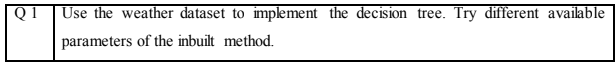

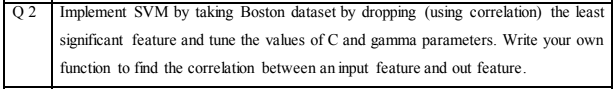

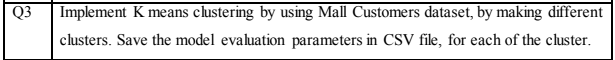

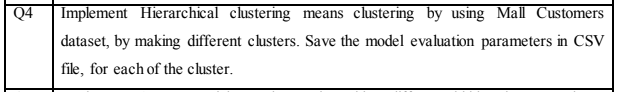

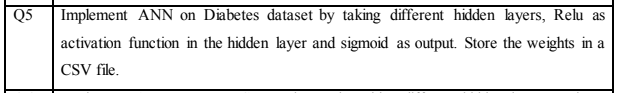

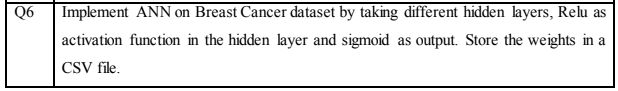